<a href="https://colab.research.google.com/github/dduniverse/ML-study/blob/main/08_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리, Decision Tree
관측값과 목푯값을 연결시켜주는 예측 모델로서 나무 모양으로 데이터를 분류함
- 수많은 트리 기반 모델의 기본 모델(based model)
- 선형 모델과는 달리, 트리 모델에서는 각 변수의 특정 지점을 기준으로 데이터를 분류해가며 예측 모델을 만듦

|장점|단점|
|---|---|
|데이터에 대한 가정이 없는 모델임(Nonparametric Model)|트리가 무한정 깊어지면 오버피팅 문제를 야기할 수 있음|
|예를들어 선형 모델은 정규분포에 대한 가정이나 독립변수와 종속변수의 선형 관계 등을 가정으로 하는 모델인 반면, 결정 트리는 데이터에 대한 가정이 없어 어디에나 자유롭게 적용할 수 있음|추후에 등장할 트리 기반 모델들에 비하면 예측력이 상당히 떨어짐|
|아웃라이어에 영향을 거의 받지 않음| |
|트리 그래프를 통해서 직관적으로 이해하고 설명할 수 있음. 즉 시각화에 굉장히 탁월함| |

- 종속변수가 연속형 데이터와 범주형 데이터 모두에 사용할 수 있음
- 모델링 결과를 시각화할 목적으로 가장 유용
- 아웃라이어가 문제될 정도로 많을 때 선형 모델보다 좋은 대안이 될 수 있음


```
알고리즘의 복잡도가 증가할수록 예측력은 좋아지나 설명력은 다소 떨어지는 반비례 관계를 보임
- 예측력: 모델 학습을 통해 얼마나 좋은 예측치를 보여주는가
- 설명력: 학습된 모델을 얼마나 쉽게 해석할 수 있는가
- 의학 계열에서 특정 질병의 발병률에 대한 예측 모델을 만들 때는, 발병률을 높이거나 억제하는 중요한 요인을 밝히는 데는 설명력이 좋은 알고리즘이 적합
- 사기거래를 예측하는 모델에서는 요인보다는 더 정확하게 사기거래를 잡아낼 수 있어야하므로 예측력이 높은 알고리즘이 더 적합
```

## 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- `skipinitialspace`: 각 데이터의 첫 자리에 있는 공란을 자동 제거함 (' Male' -> 'Male')

In [2]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv'
data = pd.read_csv(file_url, skipinitialspace=True)

In [3]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data['class'].unique()  # 고윳값 확인

array(['<=50K', '>50K'], dtype=object)

In [5]:
data.info()  # 컬럼 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [6]:
data.describe()  # 통계 정보

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.describe(include='all')  # object형 데이터를 포함한 통계 정보

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## 전처리: 범주형 데이터

50K 이하를 0으로 초과를 1로 변경

In [8]:
data['class'] = data['class'].map({'<=50K': 0, '>50K': 1})  # 숫자로 변환

### 1. object형의 변수 정보 확인

In [9]:
obj_list = []
for i in data.columns:
  if data[i].dtype == 'object':  # object 데이터 타입이면 리스트에 변수 이름 추가
    obj_list.append(i)

In [10]:
obj_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

### 2. 전처리할 변수 선별

In [11]:
for i in obj_list:
  if data[i].nunique() >= 10:  # 변수의 고윳값이 10보다 크거나 같으면 컬럼명과 고유값 개수 출력
    print(i, data[i].nunique())

education 16
occupation 14
native-country 41


### 3. education 변수 처리
education을 숫자로 표현한 컬럼이 education-num인지 확인한 후 education 변수 제거

In [12]:
data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [13]:
np.sort(data['education-num'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [14]:
data[data['education-num'] == 1]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
779,64,Private,Preschool,1,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,0
818,21,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,0
1029,57,NaN,Preschool,1,Separated,NaN,Not-in-family,White,Male,0,0,40,United-States,0
1059,31,Private,Preschool,1,Never-married,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,Male,0,0,25,United-States,0
1489,19,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48079,31,State-gov,Preschool,1,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,0
48316,40,Private,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,0
48505,40,Private,Preschool,1,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,0
48640,46,Private,Preschool,1,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,0


In [15]:
data[data['education-num'] == 1]['education'].unique()

array(['Preschool'], dtype=object)

In [16]:
for i in np.sort(data['education-num'].unique()):
  print(i, data[data['education-num'] == i]['education'].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


In [17]:
data.drop('education', axis=1, inplace=True)

### 4. occupation 변수 처리
이미 비슷한 직업군끼리는 묶인 상태로 정리된 데이터로 보이므로 추가 작업은 하지 않음

In [18]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

### 5. native-country 변수 처리

In [19]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [20]:
data.groupby('native-country').mean().sort_values('class')  # 그룹별 평균 계산

<ipython-input-20-033b589e36ab>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('native-country').mean().sort_values('class')  # 그룹별 평균 계산


,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Holand-Netherlands,32.000000,10.000000,0.000000,2205.000000,40.000000,0.000000
Guatemala,32.090909,6.306818,167.875000,18.113636,38.715909,0.034091
Outlying-US(Guam-USVI-etc),38.826087,10.043478,0.000000,76.608696,41.347826,0.043478
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Mexico,33.635121,6.026288,415.954784,32.656151,40.213460,0.049422
Nicaragua,36.285714,9.000000,138.653061,69.938776,36.938776,0.061224
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
Trinadad&Tobago,39.259259,8.962963,116.185185,156.518519,38.888889,0.074074


In [21]:
country_group = data.groupby('native-country').mean()['class']  # 그룹별 class의 평균값을 계산하여 저장
country_group = country_group.reset_index()  # 인덱스 초기화(기존 인덱스는 하나의 컬럼이 됨)
country_group

<ipython-input-21-3aec8336169d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_group = data.groupby('native-country').mean()['class']  # 그룹별 class의 평균값을 계산하여 저장


,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377
5,Dominican-Republic,0.048544
6,Ecuador,0.133333
7,El-Salvador,0.070968
8,England,0.370079
9,France,0.421053


In [22]:
data = data.merge(country_group, on='native-country', how='left')  # data와 country_group을 native-county를 기준으로 결합(left join)
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.243977


class가 2개 존재하게 되어 class_x, class_y로 나타나게 됨
- 기존 class인 class_x를 다시 class로 바꿔주고
- native_country를 제거하고 class_y는 native_country로 바꿔줌

In [23]:
data.drop('native-country', axis=1, inplace=True)
data = data.rename(columns = {'class_x': 'class', 'class_y': 'native_country'})
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,native_country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,0.243977


## 전처리: 결측치 처리 및 더미 변수 변환

In [24]:
data.isnull().mean()  # 결측치 비율 확인

age               0.000000
workclass         0.057307
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native_country    0.017546
dtype: float64

보통 결측치를 숫자로 채워줄 때는 -9나 -99와 같은 임의의 숫자를 사용함
- 트리 기반 모델에서는 큰 문제가 없으나 선형 모델에서는 데이터의 왜곡을 불러오니 주의해야 함

In [25]:
data['native_country'] = data['native_country'].fillna(-99)  # 결측치를 -99로 대체

workclass는 Private의 비율이 압도적이기 때문에 이 값으로 결측치를 대체함

In [26]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [27]:
data['workclass'] = data['workclass'].fillna('Private')  # 결측치를 Private으로 대체

occupation은 어떤 특정값이 앞도적으로 많다고 하기 어려우므로 별도의 텍스트 'Unknown'으로 대체

In [28]:
data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [29]:
data['occupation'] = data['occupation'].fillna('Unknown')  # 결측치를 Unknown으로 대체

In [30]:
data = pd.get_dummies(data, drop_first=True)  # 더미 변수 생성

## 모델링 및 평가

In [31]:
# train/test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=0.4, random_state=100) 

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)  # 정확도 계산

0.815222398525874

## 모델 이해하기



### 분류 결정 트리
DecisionTreeClassifier는 각 노드(Node)의 순도가 가장 높은 방향으로 분류함
- 순도: 한 노드 안에 여러 종류가 아닌 한 종류의 목푯값만 있는 상태에 대한 지표

|낮은 순도|높은 순도|
|---|---|
|사과 3개, 복숭아 3개|사과 3개, 복숭아 0개|

- 순도를 평가하는 지표로 지니 인덱스(Gini index)와 교차 엔트로피(Cross Entropy)가 있음


**지니 인덱스**
$$1-\sum_{i=1}^{n}(p_i)^2$$
- 순도가 높을 수록 지니 인덱스는 낮은 값을 보이며, 최댓값은 0.5, 최솟값은 0이 나올 수 있음
- 결정 트리에서는 지니 인덱스가 가장 낮은 값이 나오는 특정 변수의 특정 값을 기준으로 노드를 분류함
- 사이킷런의 결정 트리에서는 기본값으로 지니 인덱스를 사용함

**교차 엔트로피**
$$-\sum_{i=1}^{n}p_i \times log_2(p_i)$$
- 순도가 높을수록 낮은 값을 보이며, 최댓값은 1까지 나올 수 있음



### 회귀 결정 트리
DecisionTreeRegressor는 가장 낮은 MSE값이 나오도록 노드를 분류함
- MSE는 사이킷런의 결정 트리 모델에서 기본값으로 설정된 평가 기준
- 필요에 따라 매개변수를 이용하여 MSE 대신 MAE나 Poisson등으로 설정할 수 있음

## 오버피팅 문제
- **오버피팅(overfitting)**: 과대적합이라고도 하며, 예측 모델이 훈련셋을 지나치게 잘 예측하면 새로운 데이터를 예측할 때 큰 오차를 유발하는 상황
- **언더피팅(underfitting)**: 과소적합이라고도 하며, 예측 모델이 충분히 학습되지 않아 훈련셋에 대해서도 좋은 예측력을 내지 못하는 상황
- 언더피팅은 무조건 피해야 하며, 데이터와 모델이 괜찮으면 잘 발생하지 않음
- 오버피팅은 머신러닝 알고리즘이 복잡해짐에 따라 빈번하게 발생하며 완전한 해결이 어려워, 줄여나가는 개념으로 접근해야 함


**편향-분산 트레이드오프(bias-variance tradeoff)**
- 편향은 독립변수와 종속변수를 모델링한 알고리즘이 적절치 못하거나 중요한 부분으 놓쳐서 제대로된 예측을 하지 못할 떄 높아짐
- 분산은 훈련셋에 있는 데이터의 노이즈에 의해 발생하는 오차
- 즉, 높은 편향은 언더피팅 문제를 불러오고, 높은 분산은 오버피팅 문제를 불러올 수 있음

## 매개변수 튜닝
결정 트리에서는 트리 깊이가 깊어질수록, 즉 수없이 많은 노드를 분류하여 모델을 만들수록 오버피팅 발생 가능성이 높음
- `max_depth`: 트리의 깊이를 제한하는 매개변수

In [34]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train socre:', accuracy_score(y_train, train_pred), 'Test_score:', accuracy_score(y_test, test_pred))  # train, test의 정확도 평가

Train socre: 0.9780242279474493 Test_score: 0.8153759533193428


train set에서의 정확도는 약 0.98, test set에서의 정확도는 약 0.81%로 train set에서는 정확도가 매우 높지만 test set에서는 상대적으로 낮은 수준임
- 이정도의 격차라면 오버피팅이 발생했다고 볼 수 있음
- 둘의 격차를 낮추면서 test set에서 정확도를 올리는 방향으로 매개변수 설정

In [35]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train socre:', accuracy_score(y_train, train_pred), 'Test_score:', accuracy_score(y_test, test_pred))  # train, test의 정확도 평가

Train socre: 0.8540180856509129 Test_score: 0.8499769667809797


max_depth = 5
- 기본 모델모다 train score가 확 낮아졌고, test score가 살짝 올라가 둘 사이의 차이는 매우 낮아짐

In [36]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train socre:', accuracy_score(y_train, train_pred), 'Test_score:', accuracy_score(y_test, test_pred))  # train, test의 정확도 평가

Train socre: 0.8598532673605187 Test_score: 0.8541741311357937


max_depth=7
- max_depth=5일 때와 거의 비슷하지만 전반적으로 조금 더 정확해짐

## 트리 그래프

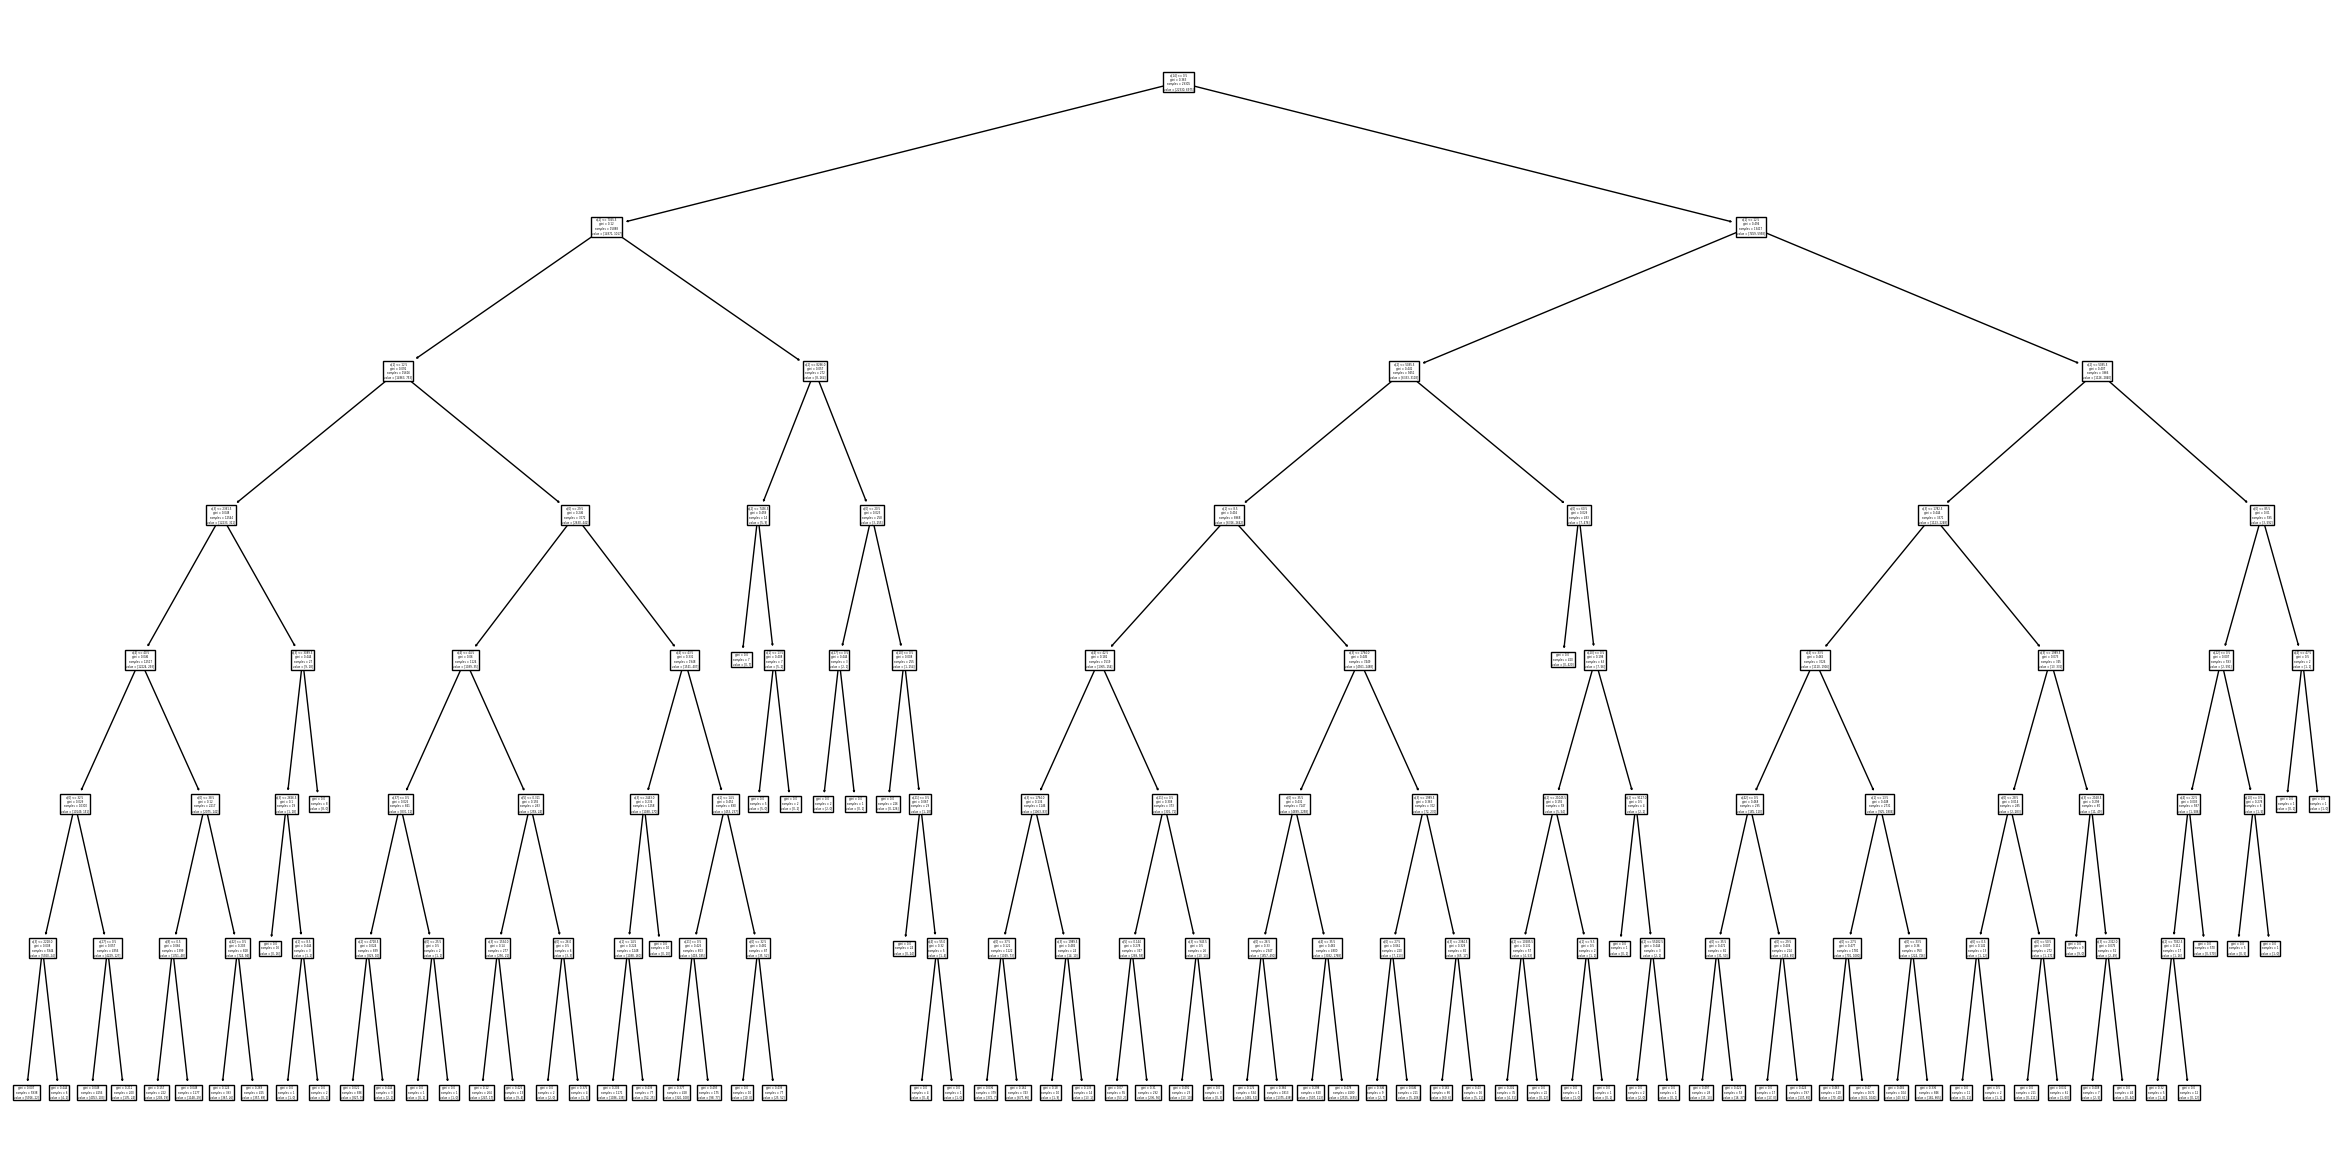

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))  # 그래프 크기
plot_tree(model)  # 트리 그래프 출력
plt.show()

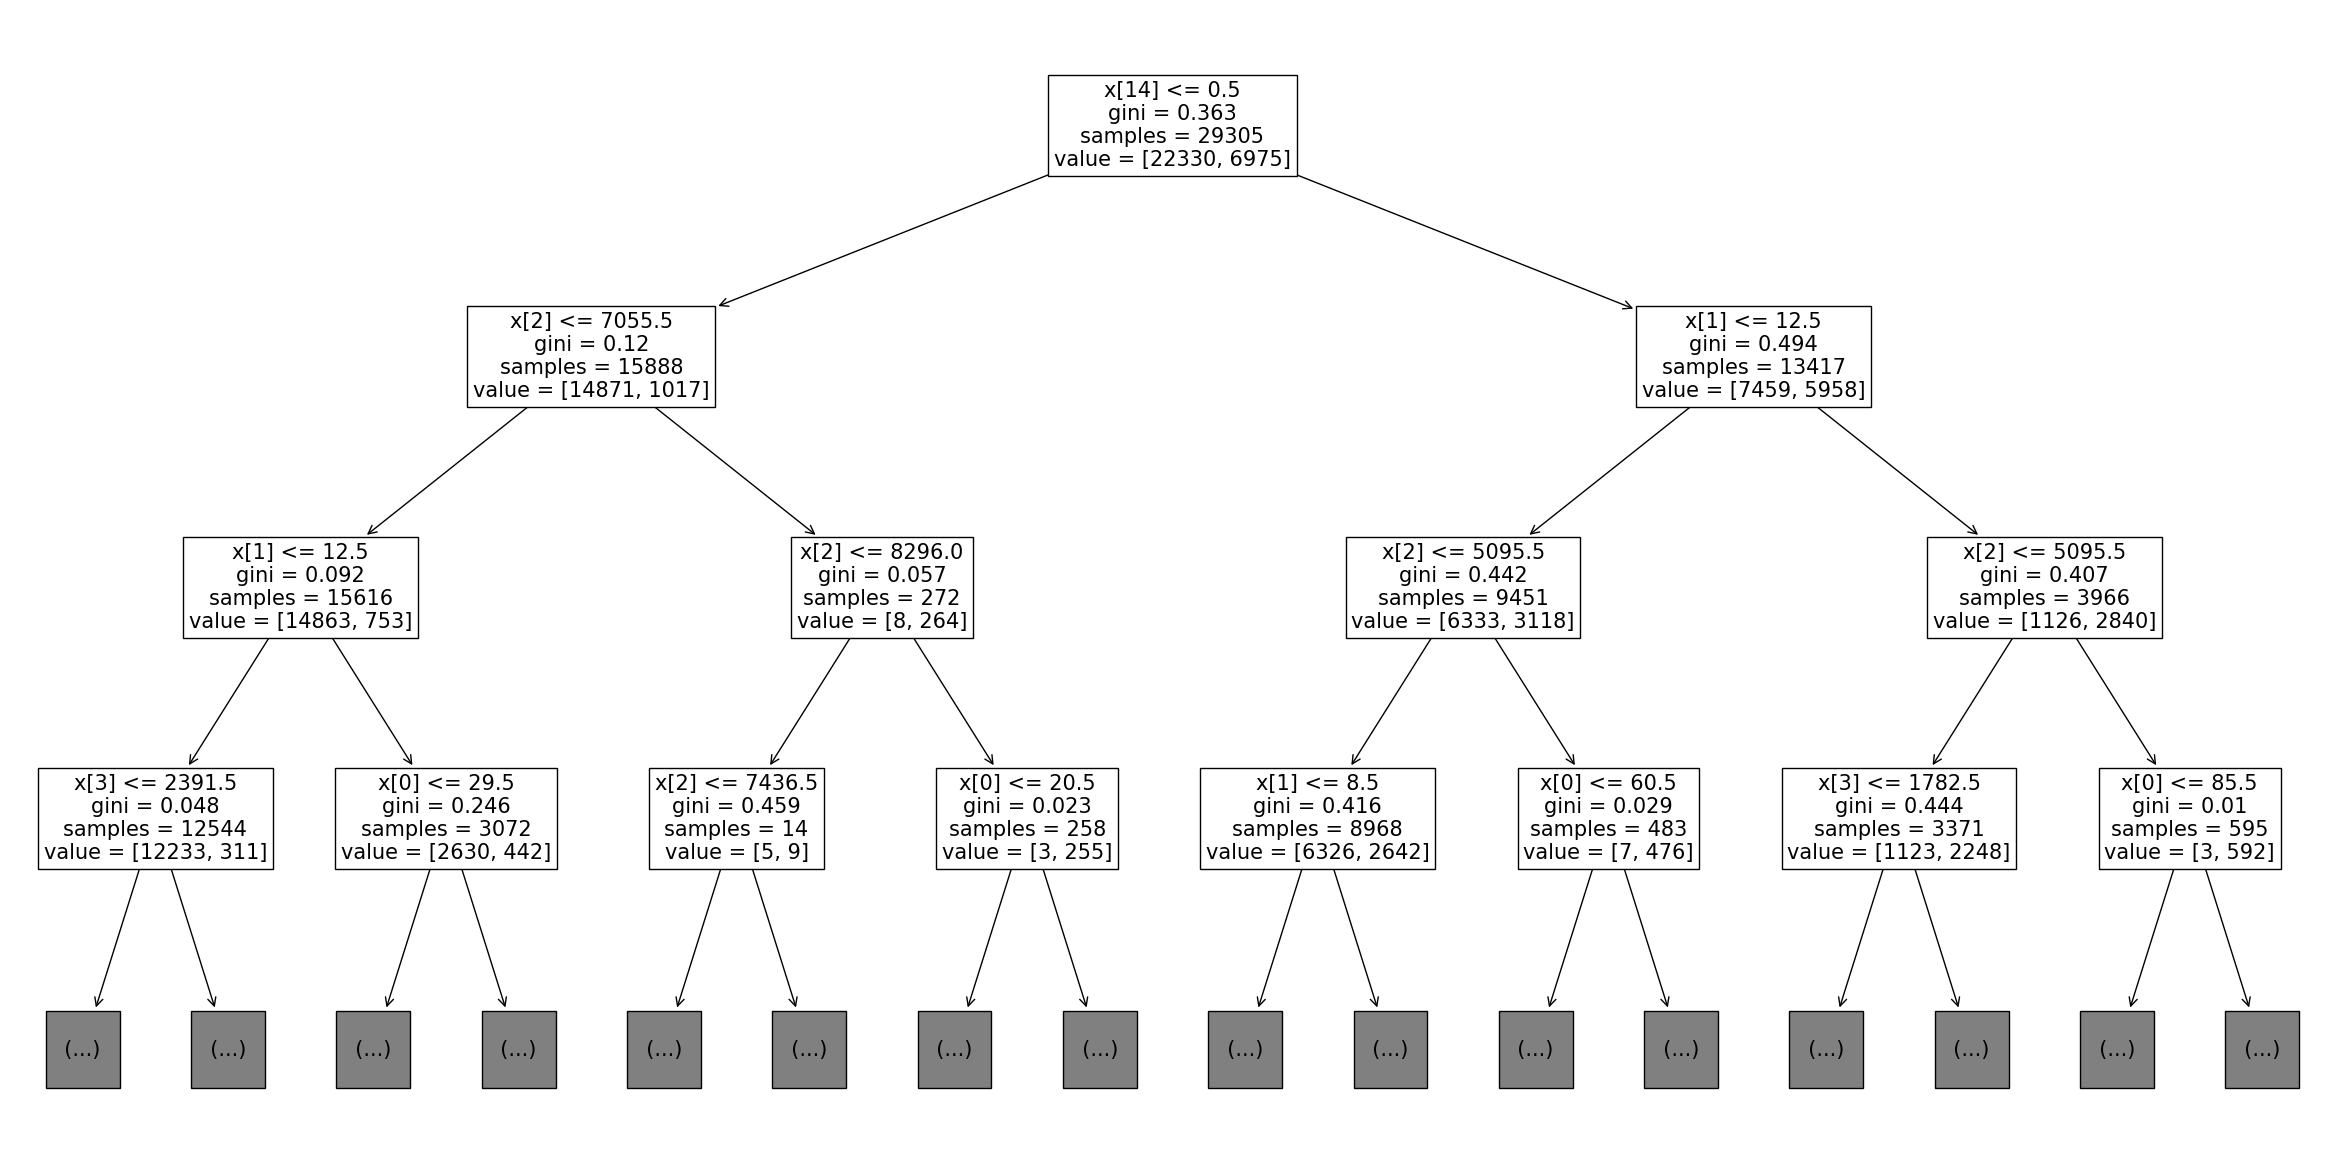

In [38]:
plt.figure(figsize=(30,15))  # 그래프 크기
plot_tree(model, max_depth=3, fontsize=15)  # 깊이와 폰트 크기를 조정하여 트리 그래프 출력
plt.show()

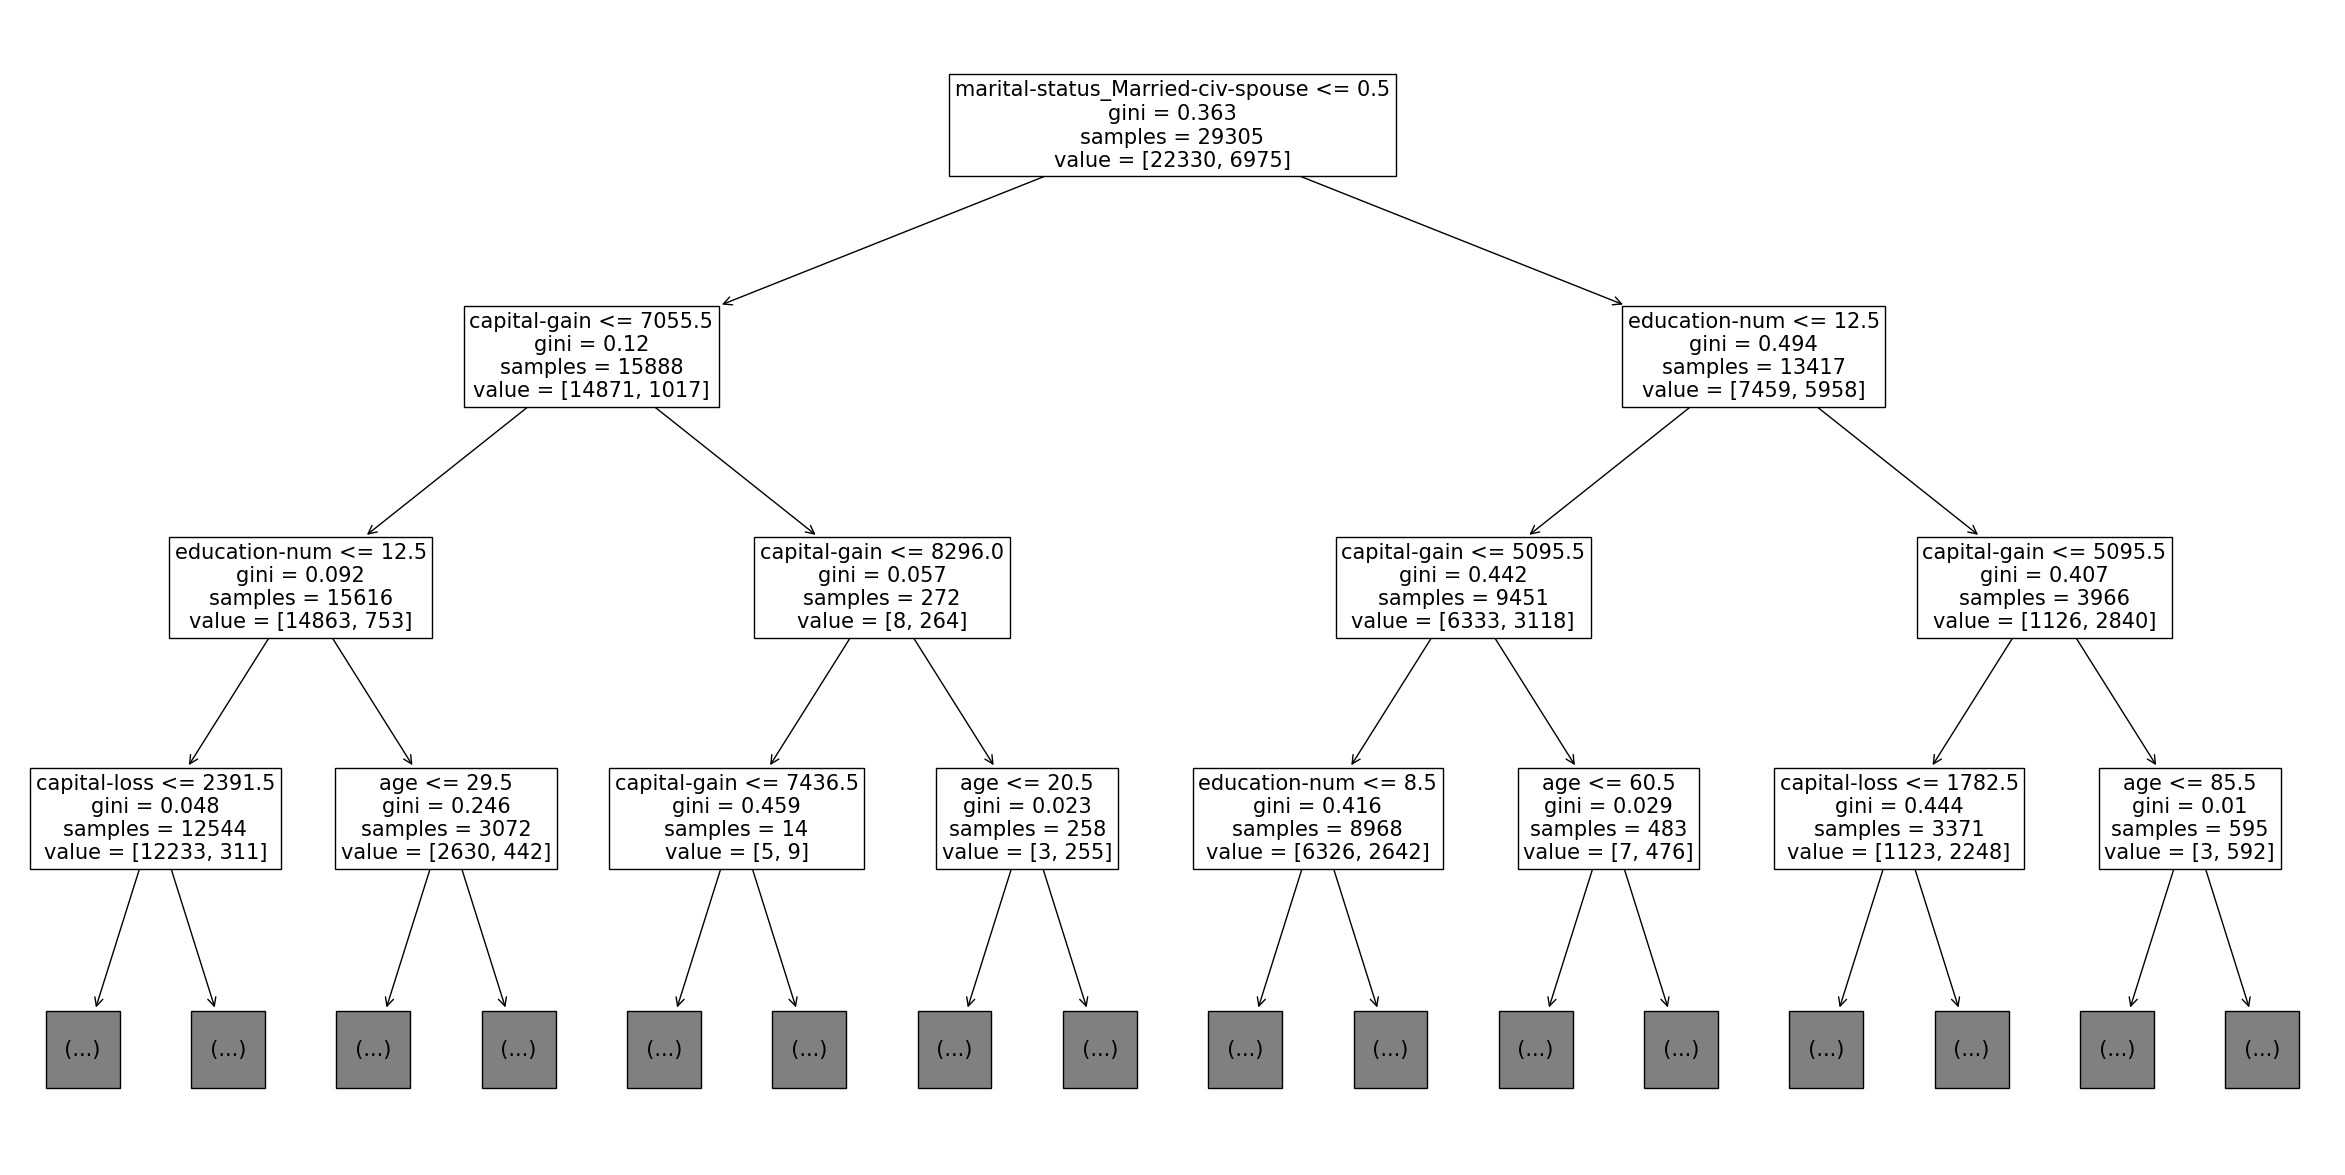

In [39]:
plt.figure(figsize=(30,15))  # 그래프 크기
plot_tree(model, max_depth=3, fontsize=15, feature_names=X_train.columns)  # 변수 이름 추가하여 그래프 출력
plt.show()

첫 번째 노드
- 분류 기준
- 지니 인덱스(gini)
- 총 데이터 수(samples)
- 목표값 0과 1의 개수(value)